<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/ColumbiaTwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes and Functions



*   PreProcessTweets Class
*   Build Vocabulary method: create a list of all words in training set

*   Training method
*   Extract Features method: determine if the words in the testing data are in the 'bag of words' of the training set





dataset we use: https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis

In [ ]:
nltk.download()
#to run this program, we need to interactively download the following nltk.data packages:
#stopwords and punkt

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


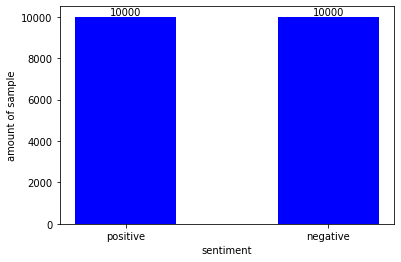

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import nltk
import numpy as np
import matplotlib.pyplot as plt

class PreProcessTweets:
    def __init__(self):
        self.__stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
        
    def processTweets(self, dataset):
        processedTweets=[]
        #df is passed in as a dataset
        #each tweet is a row in the dataset and 'tweet' in the for loop is the index of the row
        #range(len(dataset)) returns all indices of the dataset
        #thus we are going row by row, or tweet by tweet in the dataset
        for tweet in range(len(dataset)):
            #add a processed tweet represented by (['word', 'word'], label_integer) to the list processedTweets
            #dataset.iloc[tweet][1] is the text from the tweet from dataset
            #(self.processTweet(dataset.iloc[tweet][1]) is the processed text from the tweet
            #dataset.iloc[tweet][0] is the label 0 or 1 of the tweet
            processedTweets.append((self.processTweet(dataset.iloc[tweet][1]),dataset.iloc[tweet][0]))
        return processedTweets
    
    def processTweet(self, tweet):
        # convert text to lower-case
        tweet = tweet.lower()
        # remove URLs
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)
        # remove usernames
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet)
        # remove the # in #hashtag
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
        # remove repeated characters (helloooooooo into hello)
        tweet = word_tokenize(tweet)
        #returns a tuple with only necessary words
        return [word for word in tweet if word not in self.__stopwords]

#get the dataset and preprocess it
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/20000sample16M.csv')
#find the amount of data in different sentiment
pos=len(df.loc[df.label==4])
neg=len(df.loc[df.label==0])
x=['positive','negative']
y=[pos,neg]
plt.bar(x,y,alpha=1,width=0.5,color='blue')
plt.ylabel('amount of sample')
plt.xlabel('sentiment')

for a,b in zip(x,y):
    plt.text(a,b,str(b),ha='center',va='bottom',fontsize=10)

plt.show()

tweetProcessor=PreProcessTweets()
NewTrain=tweetProcessor.processTweets(df)

def buildVocabulary(preprocessedTrainingData):
    all_words = []
    for i in range(len(preprocessedTrainingData)):
        all_words.extend(preprocessedTrainingData[i][0])
    #The wordlist is an instance of FreqDist whose superclass is Counter
    #In the constructor, a dictionary is created with the word as the key and the frequency of that word as the value in each key value pair
    wordlist = nltk.FreqDist(all_words)
    #only the words are returned
    word_features = wordlist.keys()
    return word_features

def train(Train):
    trainingFeatures=nltk.classify.apply_features(extract_features,Train)
    NBayesClassifier=nltk.NaiveBayesClassifier.train(trainingFeatures)
    #print("NBayesClassifier: ", NBayesClassifier)
    return NBayesClassifier

def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    #going through each word in the training data
    for word in word_features:
        #creates a dictionary like this: {'contains(happy)': False}
        features['contains(%s)' % word] = (word in tweet_words)
    return features 

# Execution of Classes/Functions to Train and Test the Model
 

1.   Split the dataset into the training set and testing sets using KFold Cross Validation.

2.   Use buildVocabulary and train methods to train the Naive Bayes Classifier model on the training set.

3. Use extract_features method to extract features from the tweet and feed that to Naive Bayes Classifier, which will be tested.

4. The output, the prediction, will be compared to the real y output (Test_y) through the calculation of f1_score.

5. The f1_scores and the overall performance will be printed out.

In [ ]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5, shuffle=True)

sum = 0

for train_index, test_index in kf5.split(NewTrain):
    #List of tuples, or tweets, for training
    Train = [NewTrain[i] for i in train_index]
    #List of tuples, or tweets, for testing the NBayes Classifier Model
    Test = [NewTrain[i] for i in test_index]
    #word_features contains a list of all words in the training data
    word_features = buildVocabulary(Train)
    NBayesClassifier = train(Train)
    #prediction and Test_y are a list containing 4s and 0s
    prediction = [NBayesClassifier.classify(extract_features(tweet[0])) for tweet in Test]
    Test_y = [i[1] for i in Test]
    print(f1_score(Test_y,prediction,average='macro'))
    sum += float(f1_score(Test_y,prediction,average='macro'))

print("Overall Performance: " + str(sum/5))

0.7377472299551164


KeyboardInterrupt: ignored